In [1]:
import numpy as np
from util import *
import os
import cv2
from matplotlib import pyplot as plt

In [2]:
from readData import *
from showFig import *
from showCloud import *
from warp import *

In [48]:
points0, mat0 = getPoints("..//nomarker//nomarker1.npy")
points1, mat1 = getPoints("..//nomarker//nomarker2.npy")
depth0 = points0[:,2].reshape((1472, 1944))
depth1 = points1[:,2].reshape((1472, 1944))

read in ..//nomarker//nomarker1.npy
x range: -114364 ~ 7322
y range: -5338 ~ 82955
z range: -61620 ~ 984508
read in ..//nomarker//nomarker2.npy
x range: -32306 ~ 8510
y range: -5556 ~ 21488
z range: -71459 ~ 276916


In [55]:
kp1, desc1 = get_AKAZE(depth0[:900])
kp2, desc2 = get_AKAZE(depth1[572:])
matches = find_matches(desc2, desc1, 0.5)
floatpoint = get_match_points(kp2, kp1, matches)
# points = np.around(floatpoint)
points = np.int32(floatpoint)
# H = RANSAC_fit_homography(points)
points.shape

(37, 4)

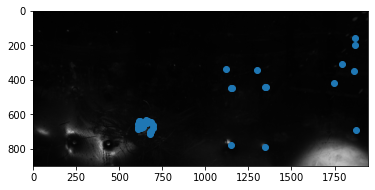

In [56]:
plt.imshow(mat0[:900], 'gray')
plt.scatter(points[:, 2], points[:, 3])
plt.show()

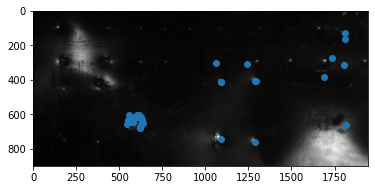

In [57]:
plt.imshow(mat1[572:], 'gray')
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [3]:
points0, mat0 = getPoints("..\dataset\scan0.npy", prange=(200, 150, (-100, -30)), skip=20)
points1, mat1 = getPoints("..\dataset\scan1.npy", prange=(200, 150, (-100, -30)), skip=20)

read in ..\dataset\scan0.npy
x range: -197 ~ 198
y range: -153 ~ 145
z range: -66 ~ 0
read in ..\dataset\scan1.npy
x range: -197 ~ 198
y range: -158 ~ 145
z range: -69 ~ 0


0.4007220216606498


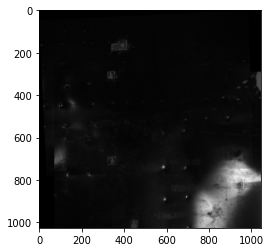

In [4]:
res, p, H = make_warped(mat0, mat1)
plt.imshow(res, cmap="gray")
plt.show()


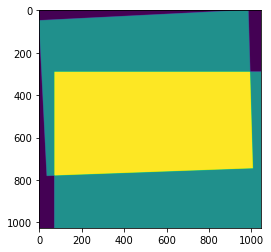

In [5]:
plt.imshow(p)
plt.show()


In [6]:
points0[:,:2] = homography_transform(points0[:,:2], H)

In [15]:
fig = dynVisual([points0, points1], ["p0", "p1"])
fig.write_html("cloudpoint.html")

In [11]:
points, _ = getPoints("..\glu\glue2", prange=(200, 150, 100), skip=20)

read in ..\glu\glue2
x range: -193 ~ 199
y range: -147 ~ 147
z range: -89 ~ 104


In [12]:
fig = dynVisual([points], ["p0"])
fig.write_html("cloudpoint.html")